In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# beginning

In [219]:
corpus = "clef" 
v2 = True
judges = "temps_"
# njudges = int(judges[0])

In [220]:
scores = pd.read_csv(f"controversy_results/controversy_scores_{judges}{corpus}.csv")
scores

,topic,score1,score2,score3,score4,score5
0,101001,3,3,3,3,3
1,101002,2,2,2,2,2
2,101003,2,2,2,2,2
3,101004,3,2,2,3,3
4,101005,2,2,2,2,3
...,...,...,...,...,...,...
295,150002,2,2,2,1,2
296,150003,2,2,2,2,2
297,150004,4,3,4,4,4
298,150005,2,3,2,2,3


In [221]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   topic   300 non-null    int64
 1   score1  300 non-null    int64
 2   score2  300 non-null    int64
 3   score3  300 non-null    int64
 4   score4  300 non-null    int64
 5   score5  300 non-null    int64
dtypes: int64(6)
memory usage: 14.2 KB


In [222]:
if corpus == "clef" and v2:
    scores["topic"] = scores["topic"].astype(str)
    scores = scores[(scores["topic"].str[-1]== "4") | (scores["topic"].str[-1]== "5") | (scores["topic"].str[-1]=="6")]
    scores.loc[:, "topic"] = scores["topic"].astype(int)
    corpus = "clef_v2"

In [223]:
scores

,topic,score1,score2,score3,score4,score5
3,101004,3,2,2,3,3
4,101005,2,2,2,2,3
5,101006,3,3,3,3,3
9,102004,2,2,2,3,2
10,102005,2,2,2,2,2
...,...,...,...,...,...,...
292,149005,2,2,2,2,2
293,149006,3,3,3,3,3
297,150004,4,3,4,4,4
298,150005,2,3,2,2,3


In [224]:
scores.describe()

,score1,score2,score3,score4,score5
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.706667,2.686667,2.653333,2.673333,2.726667
std,0.908917,0.963332,0.897324,0.908548,0.954654
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000
max,4.000000,5.000000,5.000000,4.000000,5.000000


In [225]:
# Compute the standard deviation for each row (excluding 'topic' column)
row_std = scores.iloc[:, 1:].std(axis=1)

# Compute the average of these standard deviations
row_std.mean()

0.18969771090851903

In [226]:
if judges != "":
    scores.loc[:, "score"] = scores[["score1", "score2", "score3", "score4", "score5"]].sum(axis=1)
    scores.loc[:, "score0-5"] = scores["score"] / 5

/tmp/ipykernel_13601/115274239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores.loc[:, "score"] = scores[["score1", "score2", "score3", "score4", "score5"]].sum(axis=1)
/tmp/ipykernel_13601/115274239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores.loc[:, "score0-5"] = scores["score"] / 5


In [227]:
df = scores.sort_values(by="score", ascending=False)
df = df.reset_index(drop=True)
df

,topic,score1,score2,score3,score4,score5,score,score0-5
0,112006,4,5,4,4,5,22,4.4
1,118006,4,4,5,4,4,21,4.2
2,128004,4,4,4,4,4,20,4.0
3,148005,4,4,4,4,4,20,4.0
4,137006,4,4,4,4,4,20,4.0
...,...,...,...,...,...,...,...,...
145,146004,1,1,1,1,1,5,1.0
146,145006,1,1,1,1,1,5,1.0
147,135004,1,1,1,1,1,5,1.0
148,121005,1,1,1,1,1,5,1.0


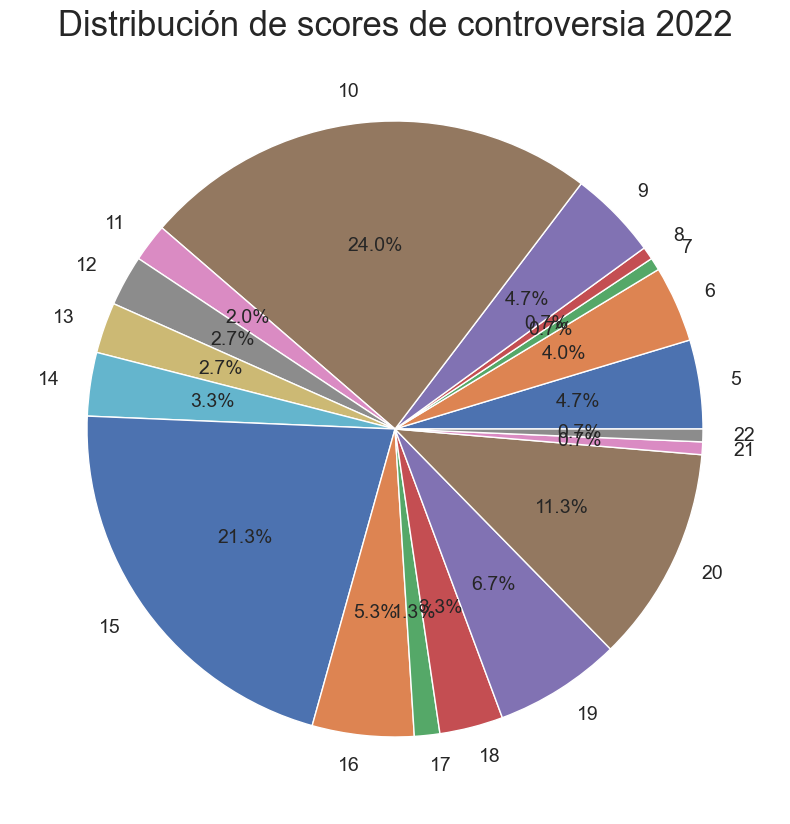

In [228]:
# Group by score and count the number of topics in each score group
df_grouped = df.groupby('score').count()
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.rename(columns={"topic": "count"})

# Do a pie chart
plt.figure(figsize=(10, 10))
plt.pie(df_grouped['count'], labels=df_grouped['score'], autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribución de scores de controversia 2022', fontsize=25)
plt.show()

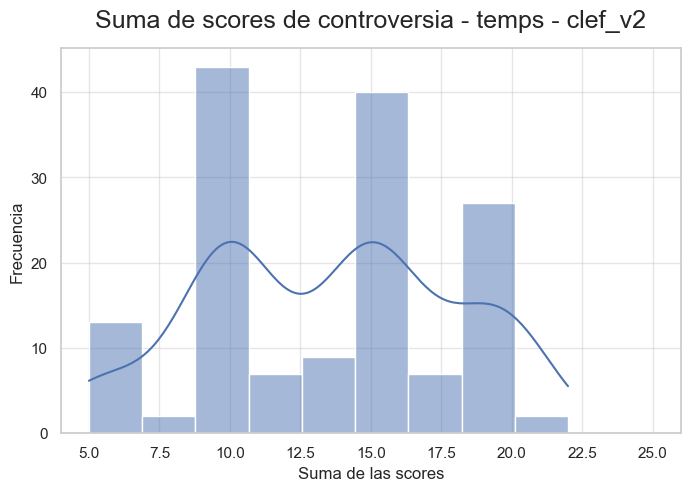

In [229]:
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], kde=True)
plt.xlabel(f"Suma de las scores")
plt.xlim(4, 26)
plt.ylabel("Frecuencia")
plt.title(f"Suma de scores de controversia - temps - {corpus}", fontsize=18, pad=15)
plt.grid(True, alpha=0.5)

plt.show()

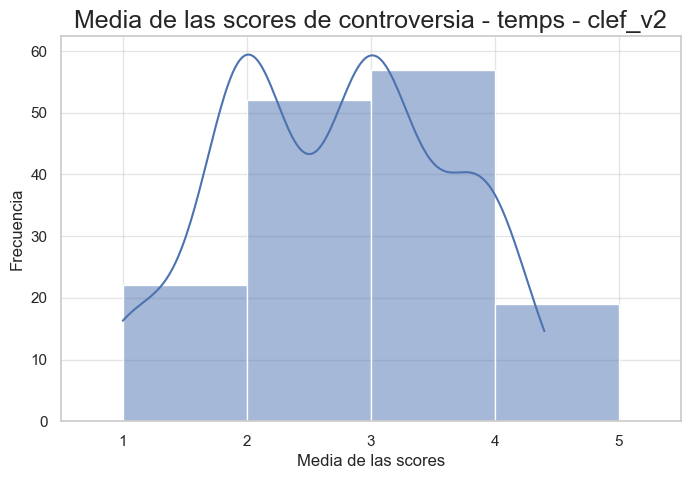

In [230]:
plt.figure(figsize=(8, 5))
bin_edges = [1, 2, 3, 4, 5]
sns.histplot(df['score0-5'], kde=True, bins=bin_edges)
plt.xlabel(f"Media de las scores")
plt.ylabel("Frecuencia")
plt.xlim(0.5, 5.5)
plt.title(f"Media de las scores de controversia - temps - {corpus}", fontsize=18)
plt.grid(True, alpha=0.5)

plt.show()

In [231]:
comp_2020 = pd.read_csv('compatibility_2020_title.csv')
comp_2021 = pd.read_csv('compatibility_2021_title.csv')
comp_2022 = pd.read_csv('compatibility_2022_title.csv')
comp_clef = pd.read_csv('compatibility_clef_title.csv')
comp_clef_v2 = pd.read_csv('compatibility_clef_layman.csv')

run_name_bm25 = {
    "2020": "all_res_misinfo-2020_bm25_title.csv",
    "2021": "all_res_C4-2021_bm25_query.csv",
    "2022": "all_res_C4-2022_bm25_query.csv",
    "CLEF": "all_res_clueweb-b13_bm25.csv",
    "clef": "all_res_clueweb-b13_bm25.csv",
    "CLEF_v2": "all_res_clueweb-b13_bm25_layman.csv",
    "clef_v2": "all_res_clueweb-b13_bm25_layman.csv"
}

run_name_minilm = {
    "2020": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_cleanhtml.txt",
    "2021": "title-rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_queries_query_cleanhtml.txt",
    "2022": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_title_cleanhtml.txt",
    "CLEF": "rerank_MiniLM-L-12-v2_top100_cleanhtml.txt",
    "clef": "rerank_MiniLM-L-12-v2_top100_cleanhtml.txt",
    "CLEF_v2": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_top100_cleanhtml.txt",
    "clef_v2": "rerank_bm25-cross-encoder_cross-encoder-ms-marco-MiniLM-L-12-v2_top100_cleanhtml.txt"
}

comp_2020 = comp_2020[comp_2020["run"] == run_name_minilm["2020"]]
comp_2021 = comp_2021[comp_2021["run"] == run_name_minilm["2021"]]
comp_2022 = comp_2022[comp_2022["run"] == run_name_minilm["2022"]]
comp_clef = comp_clef[comp_clef["run"] == run_name_minilm["clef"]]
comp_clef_v2 = comp_clef_v2[comp_clef_v2["run"] == run_name_minilm["CLEF_v2"]]

comps = {"2020": comp_2020, "2021": comp_2021, "2022": comp_2022, "clef": comp_clef, "clef_v2": comp_clef_v2}

In [232]:
label_mapping = {
    "misinfo-qrels-graded.helpful-only": "helpful",
    "misinfo-qrels-graded.harmful-only": "harmful",
    "misinfo-qrels.graded-helpful-only": "helpful",
    "misinfo-qrels.graded-harmful-only": "harmful",
    "task1_qtrust_mapped_positive.tsv": "helpful",
    "task1_qtrust_mapped_negative.tsv": "harmful"
}

for comp in comps.values():
    comp["qrels"] = comp["qrels"].map(label_mapping)

comps["clef_v2"]

,run,qrels,p,all,101004,101005,101006,102004,102005,102006,...,147006,148004,148005,148006,149004,149005,149006,150004,150005,150006
2,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,NaN,0.95,0.1282,0.2565,0.5514,0.4375,0.0888,0.2691,0.1875,...,0.1661,0.0751,0.0003,0.1213,0.0557,0.2859,0.2968,0.2381,0.2164,0.3278
3,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,NaN,0.95,0.1287,0.0004,0.0004,0.0003,0.2170,0.1571,0.2224,...,0.0642,0.0139,0.0825,0.0083,0.1993,0.0040,0.0588,0.2450,0.2978,0.1394


In [233]:
for key, comp in comps.items():
    comp_diff = comp.loc[:, ~comp.columns.isin(['run', "qrels", "p", 'all'])]

    comp_diff = comp_diff.diff() * (-1)

    comp_diff["run"] = run_name_minilm[corpus]
    comp_diff["qrels"] = "diff"
    comp_diff["p"] = 0.95
    comp_diff["all"] = np.NaN
    comp_diff = comp_diff.iloc[1, :]

    comps[key] = pd.concat([comp, comp_diff.to_frame().T])

comps["clef_v2"]
    

/tmp/ipykernel_13601/1337240837.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_13601/1337240837.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comps[key] = pd.concat([comp, comp_diff.to_frame().T])
/tmp/ipykernel_13601/1337240837.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when dete

,run,qrels,p,all,101004,101005,101006,102004,102005,102006,...,147006,148004,148005,148006,149004,149005,149006,150004,150005,150006
2,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,NaN,0.95,0.1282,0.2565,0.5514,0.4375,0.0888,0.2691,0.1875,...,0.1661,0.0751,0.0003,0.1213,0.0557,0.2859,0.2968,0.2381,0.2164,0.3278
3,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,NaN,0.95,0.1287,0.0004,0.0004,0.0003,0.217,0.1571,0.2224,...,0.0642,0.0139,0.0825,0.0083,0.1993,0.004,0.0588,0.245,0.2978,0.1394
3,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,diff,0.95,NaN,0.2561,0.551,0.4372,-0.1282,0.112,-0.0349,...,0.1019,0.0612,-0.0822,0.113,-0.1436,0.2819,0.238,-0.0069,-0.0814,0.1884


In [234]:
new_row = {col: np.nan for col in comps[corpus].columns}
new_row["run"] = "controversy"
new_row["qrels"] = "helpful"

for _, row in df.iterrows():
    col_name = str(int(row["topic"]))
    if col_name in new_row:
        new_row[col_name] = float(row["score0-5"])
    else:
        print("ERROR")

data = pd.concat([comps[corpus], pd.DataFrame([new_row])], ignore_index=True)
data = data.T
data

,0,1,2,3
run,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,rerank_bm25-cross-encoder_cross-encoder-ms-mar...,controversy
qrels,NaN,NaN,diff,helpful
p,0.95,0.95,0.95,NaN
all,0.1282,0.1287,NaN,NaN
101004,0.2565,0.0004,0.2561,2.6
...,...,...,...,...
149005,0.2859,0.004,0.2819,2.0
149006,0.2968,0.0588,0.238,3.0
150004,0.2381,0.245,-0.0069,3.8
150005,0.2164,0.2978,-0.0814,2.4


In [235]:
boxplot_data = data.iloc[4:, :].rename(columns={0: "helpful", 1: "harmful", 2: "diff", 3: "controversy"})
#boxplot_data = boxplot_data.astype({"controversy": int})
boxplot_data["controversy_round"] = round(boxplot_data["controversy"].astype(np.float64)).astype(int)
boxplot_data

,helpful,harmful,diff,controversy,controversy_round
101004,0.2565,0.0004,0.2561,2.6,3
101005,0.5514,0.0004,0.551,2.2,2
101006,0.4375,0.0003,0.4372,3.0,3
102004,0.0888,0.217,-0.1282,2.2,2
102005,0.2691,0.1571,0.112,2.0,2
...,...,...,...,...,...
149005,0.2859,0.004,0.2819,2.0,2
149006,0.2968,0.0588,0.238,3.0,3
150004,0.2381,0.245,-0.0069,3.8,4
150005,0.2164,0.2978,-0.0814,2.4,2


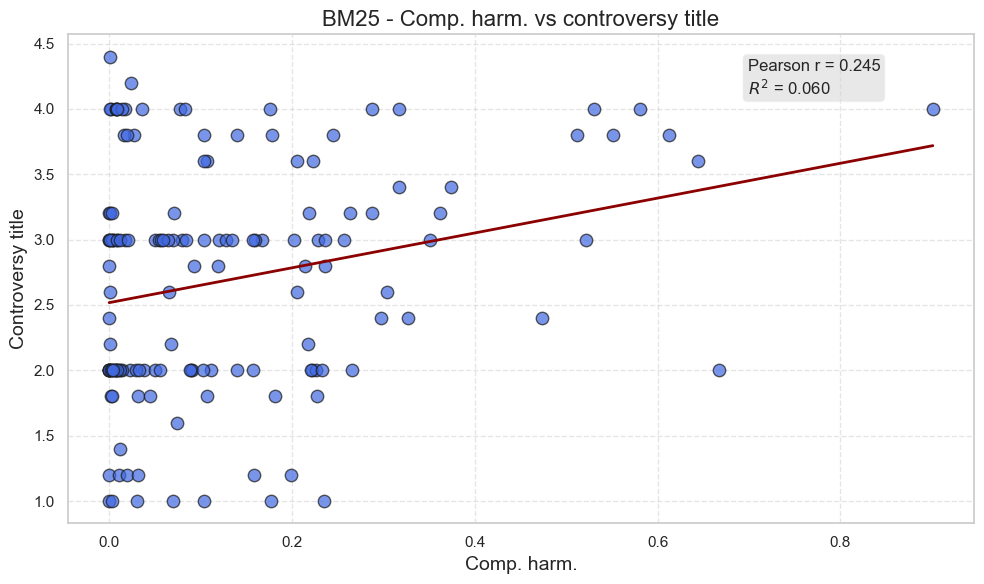

In [236]:
boxplot_data["harmful"] = pd.to_numeric(boxplot_data["harmful"], errors="coerce")
boxplot_data["controversy"] = pd.to_numeric(boxplot_data["controversy"], errors="coerce")

# Drop NaNs for correlation calculation
clean_data = boxplot_data[["harmful", "controversy"]].dropna()

# Compute Pearson correlation
r_value = clean_data["harmful"].corr(clean_data["controversy"])
r_squared = r_value ** 2

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.regplot(
    x="harmful",
    y="controversy",
    data=clean_data,
    scatter_kws={"color": "royalblue", "alpha": 0.7, "s": 80, "edgecolor": "k"},
    line_kws={"color": "darkred", "linewidth": 2},
    ci=None
)

# Annotate controversys
plt.text(
    0.75, 0.95,
    f"Pearson r = {r_value:.3f}\n"
    f"$R^2$ = {r_squared:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5)
)

# Final touches
plt.title(f"MiniLM - Comp. harm. vs controversy title", fontsize=16)
plt.xlabel("Comp. harm.", fontsize=14)
plt.ylabel(f"Controversy title", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [237]:
boxplot_data.corr(method="pearson").round(3)   # Pearson correlation

,helpful,harmful,diff,controversy,controversy_round
helpful,1.000,-0.271,0.738,-0.084,-0.109
harmful,-0.271,1.000,-0.850,0.245,0.244
diff,0.738,-0.850,1.000,-0.218,-0.230
controversy,-0.084,0.245,-0.218,1.000,0.983
controversy_round,-0.109,0.244,-0.230,0.983,1.000


In [238]:
boxplot_data.corr(method="kendall").round(3)

,helpful,harmful,diff,controversy,controversy_round
helpful,1.000,-0.181,0.608,-0.100,-0.116
harmful,-0.181,1.000,-0.574,0.136,0.154
diff,0.608,-0.574,1.000,-0.128,-0.133
controversy,-0.100,0.136,-0.128,1.000,0.904
controversy_round,-0.116,0.154,-0.133,0.904,1.000


In [239]:
boxplot_data.corr(method="spearman").round(3)

,helpful,harmful,diff,controversy,controversy_round
helpful,1.000,-0.266,0.783,-0.141,-0.152
harmful,-0.266,1.000,-0.738,0.189,0.200
diff,0.783,-0.738,1.000,-0.171,-0.173
controversy,-0.141,0.189,-0.171,1.000,0.966
controversy_round,-0.152,0.200,-0.173,0.966,1.000


In [240]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

def corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)
    
    # DataFrames to store results
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)
    
    for i in range(n):
        for j in range(n):
            if i <= j:  # compute only upper triangle and diagonal
                col1 = df.iloc[:, i]
                col2 = df.iloc[:, j]
                # drop NaNs
                valid = col1.notna() & col2.notna()
                if valid.sum() > 1:  # Need at least 2 valid points
                    r, p = pearsonr(col1[valid].astype(float), col2[valid].astype(float))
                    corr_matrix.iloc[i, j] = r
                    corr_matrix.iloc[j, i] = r
                    pval_matrix.iloc[i, j] = p
                    pval_matrix.iloc[j, i] = p
    
    return corr_matrix, pval_matrix


def kendall_corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)

    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

    for i in range(n):
        for j in range(i, n):  # only upper triangle and diagonal
            col1 = pd.to_numeric(df.iloc[:, i], errors='coerce')
            col2 = pd.to_numeric(df.iloc[:, j], errors='coerce')
            valid = col1.notna() & col2.notna()
            if valid.sum() > 1:
                r, p = kendalltau(col1[valid].astype(float), col2[valid].astype(float))
                corr_matrix.iloc[i, j] = r
                corr_matrix.iloc[j, i] = r
                pval_matrix.iloc[i, j] = p
                pval_matrix.iloc[j, i] = p

    return corr_matrix, pval_matrix


def spearman_corr_with_pvalues(df):
    cols = df.columns
    n = len(cols)

    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cols, index=cols)
    pval_matrix = pd.DataFrame(np.ones((n, n)), columns=cols, index=cols)

    for i in range(n):
        for j in range(i, n):  # only upper triangle and diagonal
            col1 = pd.to_numeric(df.iloc[:, i], errors='coerce')
            col2 = pd.to_numeric(df.iloc[:, j], errors='coerce')
            valid = col1.notna() & col2.notna()
            if valid.sum() > 1:
                r, p = spearmanr(col1[valid].astype(float), col2[valid].astype(float))
                corr_matrix.iloc[i, j] = r
                corr_matrix.iloc[j, i] = r
                pval_matrix.iloc[i, j] = p
                pval_matrix.iloc[j, i] = p

    return corr_matrix, pval_matrix

In [241]:
corr_matrix, pval_matrix = spearman_corr_with_pvalues(boxplot_data)

In [242]:
corr_matrix.round(3)

,helpful,harmful,diff,controversy,controversy_round
helpful,1.000,-0.266,0.783,-0.141,-0.152
harmful,-0.266,1.000,-0.738,0.189,0.200
diff,0.783,-0.738,1.000,-0.171,-0.173
controversy,-0.141,0.189,-0.171,1.000,0.966
controversy_round,-0.152,0.200,-0.173,0.966,1.000


In [243]:
alpha = 0.05
significant_mask = pval_matrix < alpha

# p-value < alpha => significant
significant_mask

,helpful,harmful,diff,controversy,controversy_round
helpful,True,True,True,False,False
harmful,True,True,True,True,True
diff,True,True,True,True,True
controversy,False,True,True,True,True
controversy_round,False,True,True,True,True


# pval

In [244]:
pval_matrix.loc["controversy", ["helpful", "harmful", "diff"]].round(3)

helpful    0.086
harmful    0.021
diff       0.036
Name: controversy, dtype: float64

In [245]:
palette = sns.color_palette("rocket_r", 5)  # Get 5 colors from 'rocket_r'
selected_colors = [palette[0], palette[1], palette[2], palette[3], palette[4]]

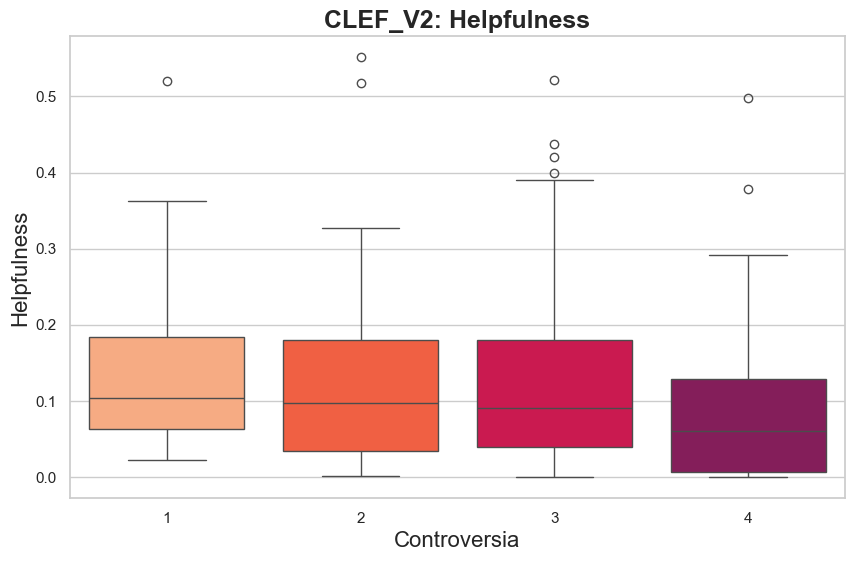

In [246]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='helpful', data=boxplot_data)

# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Helpfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Helpfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

/tmp/ipykernel_13601/156280293.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


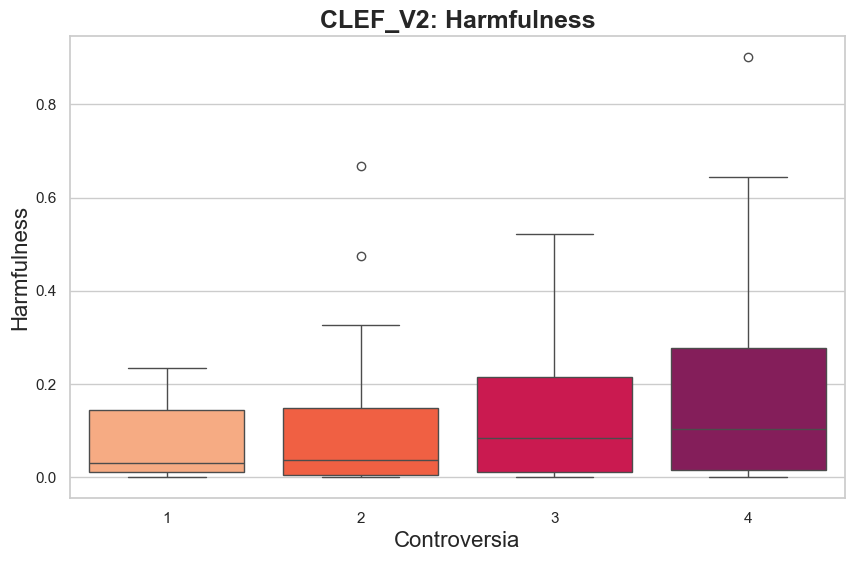

In [247]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='harmful', data=boxplot_data)


# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors


ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Harmfulness", fontsize=16)
plt.title(f"{corpus.upper()}: Harmfulness", fontsize=18, fontweight="bold")

# Show the plot
plt.show()

/tmp/ipykernel_13601/2047313908.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.xaxis.get_major_locator().set_params(integer=True)


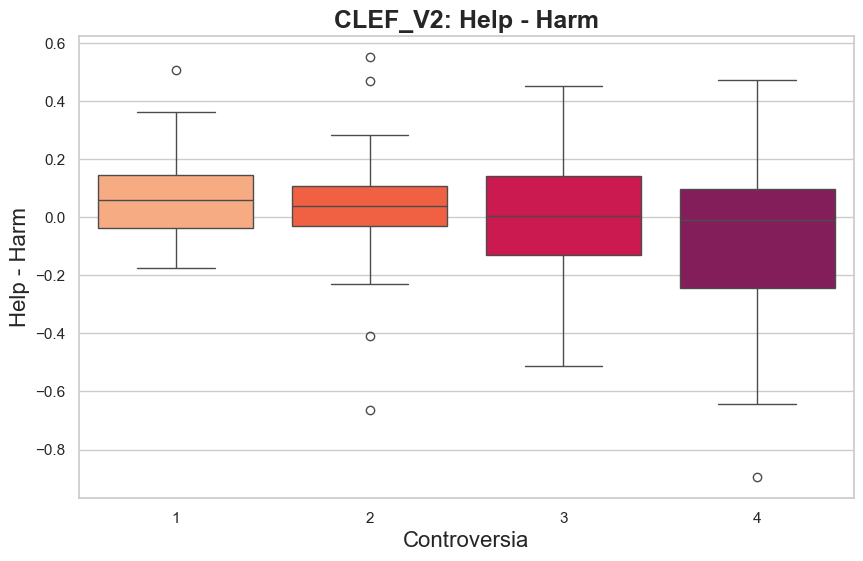

In [248]:
# Create a boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='controversy_round', y='diff', data=boxplot_data)


# Apply different colors to each bin
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(selected_colors[i % len(selected_colors)])  # Cycle through colors


ax.xaxis.get_major_locator().set_params(integer=True)

plt.xlabel("Controversia", fontsize=16)
plt.ylabel("Help - Harm", fontsize=16)
plt.title(f"{corpus.upper()}: Help - Harm", fontsize=18, fontweight="bold")

# Show the plot
plt.show()